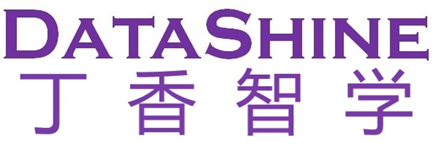
<br><font size=5>本视频和文档由“丁香智学（DataShine）”培训机构发布（武汉丁香智慧数据科技有限公司主办）。<br><br>
转发和引用请注明来源和作者：丁香智学-李进华博士</font>

<div align='center'><font color='orange' size=5>----------------------------StatsModels多元线性回归模型的回归系数与统计量解读----------------------------</font></div><br>
StatsModels多元线性回归模型示例，全面深入解读运行结果，包括所有统计量和参数。
<br>代码Github地址：<a href='https://github.com/jinhualee/datashine'>https://github.com/jinhualee/datashine</a>

多元线性回归模型: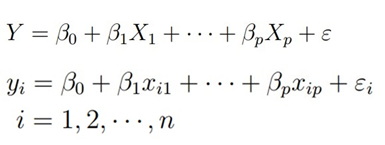


In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
np.random.seed(42)
x1 = np.random.normal(0,0.4,100)
x2 = np.random.normal(0,0.6,100)
x3 = np.random.normal(0,0.2,100)
eps = np.random.normal(0,0.05,100)
X = np.c_[x1,x2,x3]
beta = [0.1,0.2,0.7]
y = np.dot(X,beta) + eps
X_model = sm.add_constant(X)
model = sm.OLS(y,X_model)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     617.1
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           1.38e-62
Time:                        11:56:34   Log-Likelihood:                 172.11
No. Observations:                 100   AIC:                            -336.2
Df Residuals:                      96   BIC:                            -325.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.004      0.981      0.329      -0.004       0.013
x1             0.0778      0.013      6.197      0.000       0.053       0.103
x2             0.1968      0.008     25.128      0.000       0.181       0.212
x3             0.7067      0.021     33.885      0.000       0.665       0.748
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.317
Skew:                           0.169   Prob(JB):                        0.518
Kurtosis:                       2.551   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div align='center'><font color='orange' size=5>----------------------------手工编码复现参数估计和各统计量的计算过程----------------------------</font></div>

<br>1、最小二乘法实现参数估计——估计自变量X的系数

In [23]:
'''
   回归系数的计算：X转置乘以X，对点积求逆后，再点乘X转置，最后点乘y   
'''
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_model.T,X_model)),X_model.T),y)#回归系数
print('回归系数:',np.round(beta_hat,4))#四舍五入取小数点后4位
print('回归方程：Y_hat=%0.4f+%0.4f*X1+%0.4f*X2+%0.4f*X3' % (beta_hat[0],beta_hat[1],beta_hat[2],beta_hat[3]))

回归系数: [0.0044 0.0778 0.1968 0.7067]
回归方程：Y_hat=0.0044+0.0778*X1+0.1968*X2+0.7067*X3


解析：
普通最小二乘法公式推导请参考：https://blog.csdn.net/J_Boom/article/details/86763816
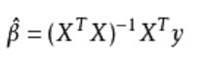

<br>2、R方与调整后R方与下文中的各种统计量一起用来检验回归方程的显著性

In [24]:
y_hat = np.dot(X_model,beta_hat)#回归值（拟合值）的计算
y_mean = np.mean(y)
sst = sum((y-y_mean)**2)#总平方和：即y减去y均值后差的平方和
ssr = sum((y_hat-y_mean)**2)#回归平方和:y回归值减去y均值后差的平方和
#sse = sum((y-y_hat)**2)#残差平方和:y值减去y回归值之差的平方和
sse = sum(results.resid**2)
R_squared =1 - sse/sst#R方：1减去残差平方和除以总平方和的差
print('R方:',round(R_squared,3))
#调整后平方和：100表示样本数据总数(n)，3表示自变量个数(p)
adjR_squared =1- (sse/(100-3-1))/(sst/(100-1))
print('调整后R方:',round(adjR_squared,3))

R方: 0.951
调整后R方: 0.949


<br>3、F统计量以及F统计量的p值，对数似然，赤池信息准则(AIC)，贝叶斯信息准则(BIC)

In [25]:
F = (ssr/3)/(sse/(100-3-1));
print('F统计量：',round(F,1))
F_p = scipy.stats.f.sf(F,3,96)#使用F分布的残存函数计算P值
print('F统计量的P值：', F_p)

#对数似然值计算公式： L=-(n/2)*ln(2*pi)-(n/2)*ln(sse/n)-n/2
res = results.resid#残差
#res = y-y_hat
sigma_res = np.std(res) #残差标准差
var_res = np.var(res) #残差方差
ll = -(100/2)*np.log(2*np.pi)-(100/2)*np.log(var_res)-100/2
print('对数似然：', round(ll,2))

#赤池信息准则:-2乘以对数似然比+2*（参数个数+1）。
#−2ln(L)+2(p+1)（赤池弘次），其中p为参数个数，ln(L)即ll
AIC  = -2*ll + 2*(3+1)
print('AIC：',round(AIC,1))

# 贝叶斯信息准则：−2ln(L)+ln(n)∗(p+1),其中ln(L)即llr
BIC = -2*ll+np.log(100)*(3+1) 
print('BIC：',round(BIC,1))

F统计量： 617.1
F统计量的P值： 1.3817403300252077e-62
对数似然： 172.11
AIC： -336.2
BIC： -325.8


F显著性检验：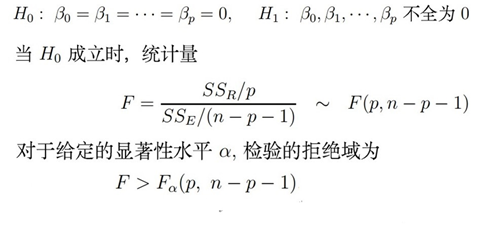

<br>4、参数标准差(std err),t值，p值以及置信区间

In [26]:
from  scipy.stats import t,f
C = np.linalg.inv(np.dot(X_model.T,X_model))#X倒置点乘X，然后对点集求逆
C_diag = np.diag(C)#去除对角线的值
sigma_unb= (sse/(100-3-1))**(1/2)#残差标准差的无偏估计：残差平方和/（样本数减参数个数减1）
'''
回归系数标准差std err的计算，然后在标准差计算时根据
系数的下标取C矩阵对角线上的相应数值，即C_diag相应值
计算方式：残差标准差（无偏估计）乘以（C矩阵对角线上对应值的开平方）
'''
stdderr_const = sigma_unb*(C_diag[0]**(1/2))#常数项（截距）的标准差
print('常数项（截距）的标准差：',round(stdderr_const,3))
stderr_x1 = sigma_unb*(C_diag[1]**(1/2))#第一个系数对应
print('beta1的标准差：',round(stderr_x1,3))
stderr_x2 = sigma_unb*(C_diag[2]**(1/2))#第二个系数对应C[1,1]
print('beta2的标准差：',round(stderr_x2,3))
stderr_x3 = sigma_unb*(C_diag[3]**(1/2))#第三个系数对应C[2,2]
print('beta3的标准差：',round(stderr_x3,3))

常数项（截距）的标准差： 0.004
beta1的标准差： 0.013
beta2的标准差： 0.008
beta3的标准差： 0.021


回归系数标准差：
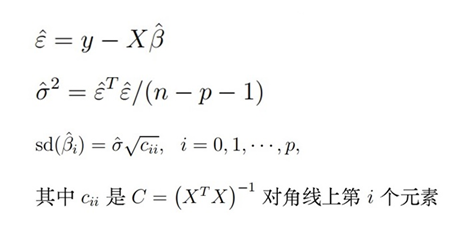

In [27]:
#残差标准差，残差标准差的无偏估计
print('残差的标准差：%0.10f\n残差标准差的无偏估计：%0.10f'%(np.std(res),sigma_unb))

残差的标准差：0.0432801785
残差标准差的无偏估计：0.0441726472


In [28]:
'''
回归方程的显著性检验
(1) t检验：beta_hat[i](相应的回归参数)除以相应系数标准差
(2) 使用scipy.stats.t.sf残存函数（Survival function），
    等于：1-累积分布函数（1-cdf）；
    由于是对t的绝对值进行检验，因此需要乘以2。即p<-t与p>t之和  
'''
t_const = beta_hat[0]/stdderr_const
print('截距项的t值：',round(t_const,3))
p_const = 2*t.sf(t_const,96)
print("P>|t|:",round(p_const,3))
t_x1 = beta_hat[1]/stderr_x1
print('x1系数的t值：',round(t_x1,3))
p_t1 = 2*t.sf(t_x1,96)
print("P>|t|:",round(p_t1,3))
t_x2 = beta_hat[2]/stderr_x2
print('x2系数的t值：',round(t_x2,3))
p_t2 = 2*t.sf(t_x2,96)
print("P>|t|:",round(p_t2,3))
t_x3 = beta_hat[3]/stderr_x3
print('x3系数的t值：',round(t_x3,3))
p_t3 = 2*t.sf(t_x3,96)
print("P>|t|:",round(p_t3,3))

截距项的t值： 0.981
P>|t|: 0.329
x1系数的t值： 6.197
P>|t|: 0.0
x2系数的t值： 25.128
P>|t|: 0.0
x3系数的t值： 33.885
P>|t|: 0.0


回归系数显著性检验：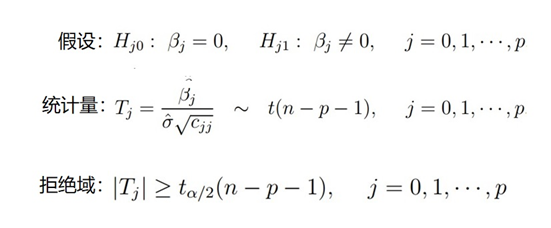

In [29]:
'''
回归系数置信区间计算公式：
betahat_i - t.ppf(1-alpha/2,n-p)*sigma_unb*C_diag[0]**(1/2)
                < =beta_i <=
betahat_i + t.ppf(1-alpha/2,n-p)*sigma_unb*C_diag[0]**(1/2)
t(1-alpha/2,n-p)是t值在0.025，自由度为n-p的分位数，由于下分位数是负值，
所以这里使用0.975来计算分位数的。调用scipy.stats.t.ppf进行计算，
实际就是cdf函数的逆函数，计算的是百分位数。
sigma_unb*C_diag[0]**(1/2)就是前面计算系数标准差的公式，这里可以直接用
系数标准差代替。
特别要注意：要使用残差标准差的无偏估计，即sigma_unb。
ppf是percent point function的简称，用来计算百分位数。
根据置信区间的理论，对于类似正态分布和t分布，t分布的概率密度函数关于y轴对称，其均值为0
其显著性水平为alpha（置信度为1-alpha）的概率分布函数的分位数，一般通过1-alpha/2进行计算
'''
const_inter_left = beta_hat[0] - t.ppf(0.975,97)*sigma_unb*C_diag[0]**(1/2)
const_inter_right = beta_hat[0] + t.ppf(0.975,97)*sigma_unb*C_diag[0]**(1/2)
print('常数项的置信区间是: [%0.3f,%0.3f]'%(const_inter_left,const_inter_right))
beta1_inter_left = beta_hat[1] - t.ppf(0.975,97)*sigma_unb*C_diag[1]**(1/2)
beta1_inter_right = beta_hat[1] + t.ppf(0.975,97)*sigma_unb*C_diag[1]**(1/2)
print('x1系数的置信区间是: [%0.3f,%0.3f]'%(beta1_inter_left,beta1_inter_right))
beta2_inter_left = beta_hat[2] - t.ppf(0.975,97)*sigma_unb*C_diag[2]**(1/2)
beta2_inter_right = beta_hat[2] + t.ppf(0.975,97)*sigma_unb*C_diag[2]**(1/2)
print('x2系数的置信区间是: [%0.3f,%0.3f]'%(beta2_inter_left,beta2_inter_right))
beta3_inter_left = beta_hat[3] - t.ppf(0.975,97)*sigma_unb*C_diag[3]**(1/2)
beta3_inter_right = beta_hat[3] + t.ppf(0.975,97)*sigma_unb*C_diag[3]**(1/2)
print('x3系数的置信区间是: [%0.3f,%0.3f]' % (beta3_inter_left,beta3_inter_right))

常数项的置信区间是: [-0.004,0.013]
x1系数的置信区间是: [0.053,0.103]
x2系数的置信区间是: [0.181,0.212]
x3系数的置信区间是: [0.665,0.748]


In [30]:
#比如对于系数，代入系数标准差进行计算，结果和上面一样。
beta3_inter_left = beta_hat[3] - t.ppf(0.975,97)*stderr_x3
beta3_inter_right = beta_hat[3] + t.ppf(0.975,97)*stderr_x3
print('x3系数的置信区间是: [%0.3f,%0.3f]' % (beta3_inter_left,beta3_inter_right))

x3系数的置信区间是: [0.665,0.748]


<br>5、Omnibus、 Prob(Omnibus), Jarque-Bera (JB),Prob(JB), Skew,  Kurtosis, Durbin-Watson,Cond. No.等值的计算。

In [31]:
'''
1、注意峰度的定义方式有两种：一是Fisher定义，正态分布值为0；另一个是Pearson定义，正态分布值为3。
StatsModels使用的是Pearson定义。按照Fisher定义，逢峰度=0表示正好符合正正态分布，
大于0表示峰比较尖，反之表示比较平。
2、对于偏度，偏度值大于0则为正偏态或左偏态；小于零则表示负偏态或右偏态。
'''
#kurtosis = ((np.sum((res-res.mean())**4))/100)/((np.sum ((res-res.mean())**2)/100)**2)-3 #Fisher定义峰度
#Pearson定义峰度
res_kurt = ((np.sum((res-res.mean())**4))/100)/((np.sum ((res-res.mean())**2)/100)**2)
res_skew = np.sum((res-res.mean())**3)/((sigma_res**3)*100)
#res_skew = 
'''
#或者使用scipy的函数计算峰度和偏度
from scipy.stats import kurtosis,skew
res_kurt = kurtosis(res,fisher=False)
res_skew = skew(res)

#也可以用pandas计算偏度和峰度,三种计算方式都有一定误差
import pandas  as pd
resFrame = pd.Series(res)
res_kurt = resFrame.kurt()
res_skew = resFrame.skew()
'''
print('残差峰度(Pearson定义)：',round(res_kurt,3))
print('残差偏度：',round(res_skew,3))

残差峰度(Pearson定义)： 2.551
残差偏度： 0.169


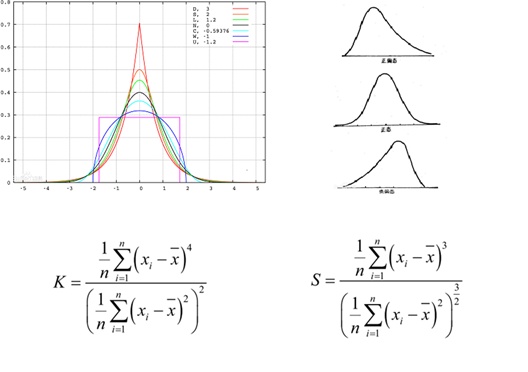

In [32]:
'''
#Jarque-Bera检验，使用scipy
from  scipy.stats import jarque_bera
jb_test = jarque_bera(res)
'''
'''#使用statsmodels.stats.api进行Jarque-Bera检验
jb_test = sms.jarque_bera(res)#返回值是个命名元组，包含J_B值及其P值
'''
#全手动计算J_B值及其P值
from scipy.stats import chi2
mu = res.mean()
diffx = res - mu
res_skew = (1 / 100 * np.sum(diffx**3)) / (1 / 100 * np.sum(diffx**2))**(3 / 2.)
res_kurt = (1 / 100 * np.sum(diffx**4)) / (1 / 100 * np.sum(diffx**2))**2
jb_value = 100 / 6 * (res_skew**2 + (res_kurt - 3)**2 / 4)
jb_p = chi2.sf(jb_value, 2)
print('Jarque-Bera (JB): ',round(jb_value,3))
print('Prob(JB): ',round(jb_p,3))

Jarque-Bera (JB):  1.317
Prob(JB):  0.518


In [46]:
#omnibus检验，使用statsmodels
omnibus_test = sms.omni_normtest(res) #omnibus检验
print('Omnibus：',round(omnibus_test.statistic,3))
print('Prob(Omnibus): ',round(omnibus_test.pvalue,3))

'''
Omnibus检验的具体步骤：
（1）计算残差的偏度检验值和峰度检验值。
（2）求出二者平方和。
（3）以平方和和自由度2为参数调用卡方分布的残存函数。
（4）平方和是Omnibus统计量的值，残存函数返回值是Omnibus统计量的P值。
从此示例可以看出scipy科学与统计计算功能之强大！
'''
from  scipy.stats import normaltest,skewtest,kurtosistest,skew,kurtosis,chi2
#normaltest(res)#此函数直接进行Omnibus检验
s, _ = skewtest(res)#注意：偏度检验和偏度并不是一回事
k, _ = kurtosistest(res)#峰度检验和峰度也不是一回事
k2 = s*s + k*k
print('------------------手动计算Omnibus检验----------------------')
print('Omnibus: ', np.round(k2,3))#
print('Prob(Omnibus):', np.round(chi2.sf(k2,2),3))#通过卡方分布的残存函数计算Omnibus的P值。

Omnibus： 1.353
Prob(Omnibus):  0.508
------------------手动计算Omnibus检验----------------------
Omnibus:  1.353
Prob(Omnibus): 0.508


In [34]:
'''
Durbin-Watson测试：越接近2，表示残差越接近正态分布
#直接调用sms.durbin_watson()函数
dw = sms.durbin_watson(res)
'''
#原始计算公式：残差的差值平方和除以残差平方和
diff_resids = np.diff(res)
dw = np.sum(diff_resids**2) / np.sum(res**2)
print('Durbin-Watson: ',round(dw,3))

Durbin-Watson:  1.821


In [35]:
'''
条件数（Cond. No.）的计算步骤如下：
（1）获取增加常量1向量后的自变量矩阵，X_model
（2）计算X_model转置与其本身的点积H
（3）计算点积的特征值
（4）最大特征值/最小特征值，然后将结果开平方
条件数是衡量矩阵病态的一个指标，理论上该值越小越好。
'''
H = np.dot(X_model.T,X_model)
eigs = np.linalg.eigh(H)[0]
cond = np.sqrt(eigs[-1]/eigs[0])
print('通过特征值计算Cond. No.: ',round(cond,3))

'''
条件数的另一种计算法：sqrt(||H||*||inv(H)||)，
即用矩阵H的范数乘以H逆的范数，然后再开平方。
'''
cond = np.sqrt(np.linalg.norm(H,ord=2)*np.linalg.norm(np.linalg.inv(H),ord=2))#注意设置ord=2
print('通过矩阵计算Cond. No.: ',round(cond,3))

通过特征值计算Cond. No.:  4.774
通过矩阵计算Cond. No.:  4.774


In [36]:
'''
多元回归分析的方差膨胀系数（VIF）的计算，这里直接调用StatsModels的函数。
某些教科书认为VIF>10即判定自变量存在多重共线性；StatsModels将
阈值设为5。
'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(X.shape[1]):
    print('x%d的VIF：%0.4f'%(i,variance_inflation_factor(X,i)))
    

#计算第i个自变量的VIF，比如i=1
k_vars = X.shape[1]#提取列数，即自变量个数
x_1 = X[:, 1]
mask = np.arange(k_vars) != 1
x_not1 = X[:, mask]
#以第i个自变量作为因变量，其他自变量作为自变量调用OLS，然后提取Rsquared_i
r_squared_1 = sm.OLS(x_1, x_not1).fit().rsquared
vif_i1= 1. / (1. - r_squared_1)
print('手动计算自变量VIF（x1）：',vif_i1)

x0的VIF：1.0534
x1的VIF：1.0196
x2的VIF：1.0345
手动计算自变量VIF（x1）： 1.019570421001318


<div align='center'><font color='orange' size=5>-------------附录------------</font></div>

In [37]:
'''
说明：查阅有关通过范数计算条件数的资料，都是用矩阵的范数乘以该矩阵逆的范数，都无开平方这个计算步骤。
statsmodels的开平方这个计算步骤不知是何用意？暂时还没弄明白。
示例：https://blog.csdn.net/qq_18343569/article/details/50404989
'''
m=np.array([[3,5,0],[2,10,4],[3,4,5]])
#m = np.asmatrix(a)
np.linalg.norm(m,ord=2)*np.linalg.norm(np.linalg.inv(m),ord=2)

5.979701783145618

In [38]:
'''
泛函分析中的范数计算.
2-范数（注意与l2范数区别）：等于矩阵的共轭转置和自身的点积生成矩阵的特征值中的最大特征值开平方。
很显然：np.linalg.norm(matrix,ord=2)等中的ord=2表示计算矩阵的2-范数。
'''
eigs_norm = np.sqrt(np.linalg.eigh(np.dot(m.T,m))[0])
print('矩阵m的2-范数（通过公式计算）：',eigs_norm.max())
norm_2 = np.linalg.norm(m,ord=2)
print('矩阵m的2-范数（调用numpy函数）：',norm_2)

矩阵m的2-范数（通过公式计算）： 13.631300150113189
矩阵m的2-范数（调用numpy函数）： 13.63130015011319


In [39]:
'''
l2范数计算与2-范数计算有区别：前者表示矩阵元素平方和，然后再开放，如下例所示：
'''
l2norm_byhand = np.sqrt(np.sum(m**2))
print('手工计算l2norm：',l2norm_byhand)
l2norm_bynormfunc = np.linalg.norm(m)#如果ord为空，缺省即l2范数
print('通过norm函数计算l2norm：',l2norm_bynormfunc)


手工计算l2norm： 14.2828568570857
通过norm函数计算l2norm： 14.2828568570857


In [40]:
#多维数组，*乘法是逐个元素相乘
m*m

array([[  9,  25,   0],
       [  4, 100,  16],
       [  9,  16,  25]])

In [41]:
m@m

array([[ 19,  65,  20],
       [ 38, 126,  60],
       [ 32,  75,  41]])

In [42]:
m1 = np.asmatrix(m)
#如果将多维数组转换成矩阵，*乘法就是矩阵乘法——点积
m1*m1

matrix([[ 19,  65,  20],
        [ 38, 126,  60],
        [ 32,  75,  41]])

In [43]:
#@也是矩阵乘法，对于多维数组和矩阵是一样的。
m1@m1

matrix([[ 19,  65,  20],
        [ 38, 126,  60],
        [ 32,  75,  41]])

In [44]:
#多维数组支持转置但是不支持共轭转置。对于实数矩阵，转置和共轭转置的结果相同
print('多维数组的转置：', m.T)
m.H

多维数组的转置： [[ 3  2  3]
 [ 5 10  4]
 [ 0  4  5]]


AttributeError: 'numpy.ndarray' object has no attribute 'H'

In [45]:
#矩阵支持共轭转置
m1.H

matrix([[ 3,  2,  3],
        [ 5, 10,  4],
        [ 0,  4,  5]])